## **1. IMPORTS**

In [ ]:
# importing important and additional library packakge

# data handling
import numpy as np
import pandas as pd

# data visualization
!pip install plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


# machine learning
from sklearn.model_selection import train_test_split

# classification training
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier

# training result metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, precision_score, recall_score, f1_score

In [ ]:
# importing dataset from googledrive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading csv file in gdrive put it into dataframe
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/diabetes_dataset.csv")

## **2. INITIAL EXPLORATORY DATA ANALYSIS**

## Reading Dataset & Initial Analysis

**Summary of the dataset**

The data used for this analysis was collected and provided by the "National Institute of Diabetes and Digestive and Kidney Diseases" as part of the Pima Indians Diabetes Database. The dataset comprises instances from a larger database, with specific constraints. All patients included in the dataset belong to the Pima Indian heritage, which is a subgroup of Native Americans. Furthermore, all individuals in the dataset are females aged 21 and above.

<br>

**Summary of Statisitcal Analysis:**

1. Features

*   Pregnancy

  In this dataset pregnancy average approximated on 3.85 week of pregancy. with standard deviation of 3.37.

*   Glucose (mg/dL)

  Median for Glucose level in this data is about 117 mg/dl which The expected values for normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L) according to WHO recommendations.



*   BloodPressure

  The average BloodPressure is about 69.1 mmHg with highest value is 122 mmHg.

*   SkinThickness

  Average of SkinThickness value in this dataset is approximately 20.5 mm. with standard deviation of 15.9 and highest value of 99mm which might be confusing for human being having approximately 9 cm of skin thickness.
  

*   Insulin

  Average value of insulin the body is 79.80 pmol/L with standard deviation of 112.4 and max value of 846. we suspect there is inconsistency in the data set for having unusual variability. another issue on significant number of missing value in data, thus this might be worth further investigation.


*   BMI

  The average value of BMI is about 31 which in medical situation is considered as obese, with standard deviation of 7.88.

*   DiabetesPedigreeFunction

    The mean of this DiabetesPedigreeFunction is approximately 0.47, with standard deviation of 0.33. with the highest value of 2.42

*   Age

    The Median value of age in this dataset is around 29 years old, with standard deviation of 11.7.
*   Outcome

   This variable  as main feature to determine whether sample is considered diabetic. which indicates 65% of samples are diabetic and 35% is non-diabetic person.


2. Findings



*   Missing Value

  There are missing value in almost all features except DiabetesPedigreeFunction and Age which having non missing value. this can be interpreted as the recording process is not taken properly.

  despite of specific reason of presence of missing value. and it is important to take notes that this may have an impact on analysis and model training result. due to zero values, we will replacing them with mean or median depends on distribution of the data.












In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# show statistical data about the dataset

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# show data that have insulin of 846 assumed that these are outliers

df[df['Insulin'] >= 500]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
228,4,197,70,39,744,36.7,2.329,31,0
247,0,165,90,33,680,52.3,0.427,23,0
286,5,155,84,44,545,38.7,0.619,34,0
409,1,172,68,49,579,42.4,0.702,28,1
584,8,124,76,24,600,28.7,0.687,52,1
655,2,155,52,27,540,38.7,0.240,25,1
753,0,181,88,44,510,43.3,0.222,26,1


In [ ]:
# Creating PieChart for distribution of Outcome using matplotlib

# counts = df['Outcome'].value_counts(dropna=False)


# counts.plot.pie(autopct='%1.1f%%', labels=['Diabetic', 'Non-Diabetic'], colors=['lightcoral', 'skyblue'], shadow=True)

# plt.title('Percentage distribution of Outcome', fontsize = 18)
# plt.ylabel('')
# plt.xlabel('Outcome', fontsize = 15)

# plt.axis('equal')
# plt.legend(fontsize=10)
# plt.show()

In [ ]:
# Creating PieChart for distribution of Outcome using Plotly

fig = px.pie(df, values=df['Outcome'].value_counts().values, names=['Diabetic', 'Non-Diabetic'], color_discrete_sequence=['lightcoral', 'skyblue'], title='Percentage distribution of Diabetic and non-diabetic', hole=0.4)


fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    legend_title_text='Diabetes Status',
    xaxis_title='Outcome',
    title={
        'text': "Percentage distribution of Diabetic and non-diabetic",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(
            size=24)})
fig.for_each_trace(lambda t: t.update(name = 'Diabetic' if t.name == '1' else 'Non-Diabetic'))

fig.show()

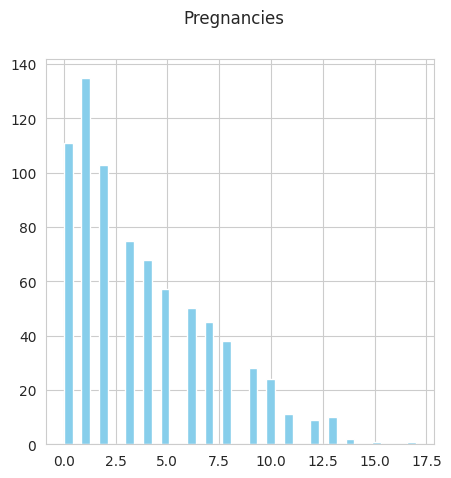

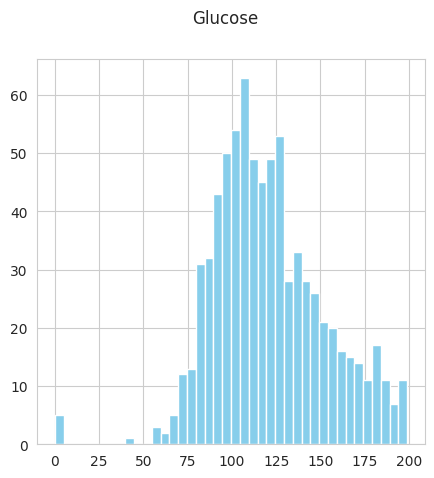

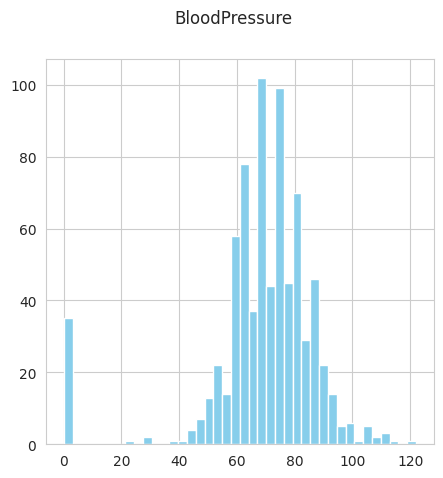

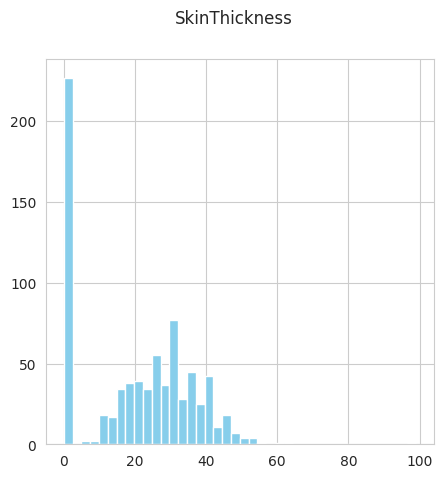

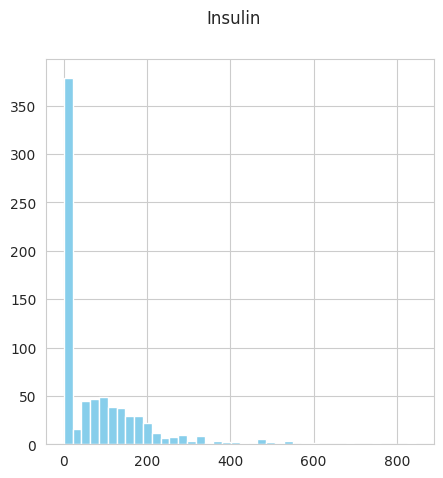

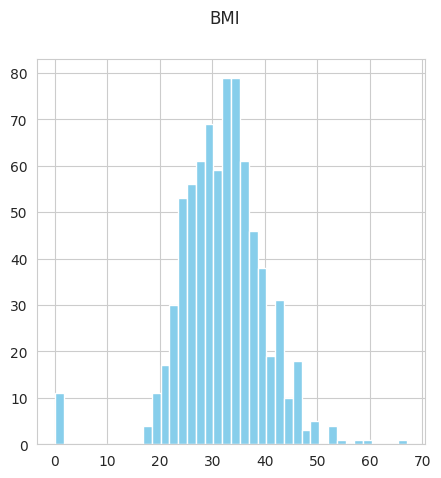

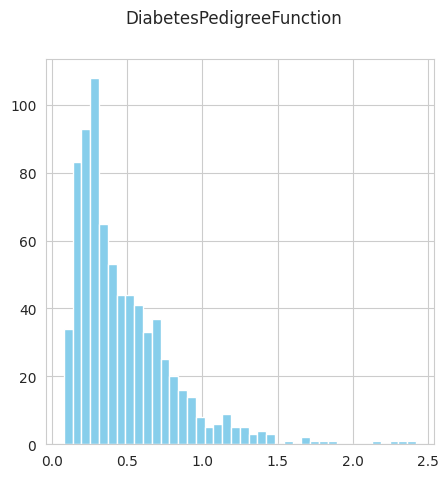

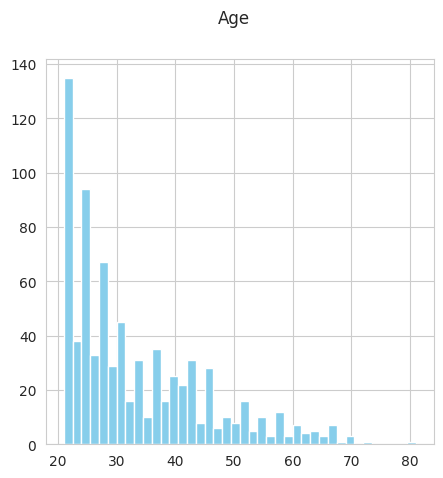

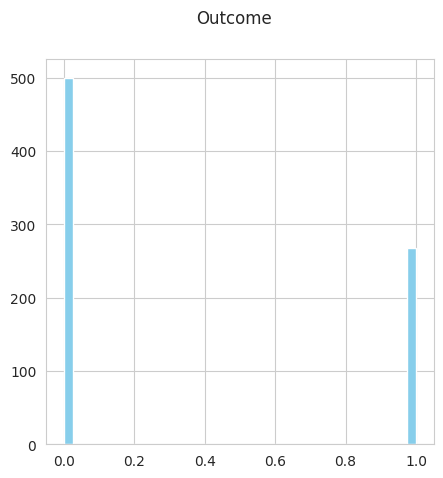

In [ ]:
# presenting all features in dataset in form of histogram

for i in df.columns:
    df[i].hist(bins=40, figsize=(5,5), color='skyblue')
    plt.suptitle(i)
    plt.show()

In [ ]:
# prompt: plot histogram from all column in dataframe using plotly

# for column in df.columns:
#   fig = px.histogram(df, x=column, title=f"Distribution of {column}",  width=800, height=500,   color_discrete_sequence=['skyblue'])
#   fig.update_xaxes(title_text=column)
#   fig.update_yaxes(title_text="Frequency")
#   fig.show()


## **3. DATA CLEANING**

In [ ]:
# Create copy of new dataframe for normalized data
df2 = df.copy()

# Calculate the average of age groups
median_age = df2['Age'].median()

# Split data into groups based on age group
age_groups = pd.cut(df2['Age'], bins=5)  # Divided into 5 groups, you can adjust as needed


# Calculate the mean and median of Insulin, Glucose for, BMI and Skin Thickness each age group
insulin_mean_by_age = df2.groupby(age_groups)['Insulin'].transform('mean')
glucose_median_by_age = df2.groupby(age_groups)['Glucose'].transform('median')
bmi_median_by_age = df2.groupby(age_groups)['BMI'].transform('mean')
skin_thickness_mean_by_age = df2.groupby(age_groups)['SkinThickness'].transform('mean')
blood_pressure_median_by_age = df2.groupby(age_groups)['BloodPressure'].transform('median')

# Replace the missing values ​​of Insulin, Glucose for, BMI and Skin Thickness with the average of the corresponding age group
df2['Insulin'] = df2['Insulin'].mask(df2['Insulin'] == 0, insulin_mean_by_age)
df2['Glucose'] = df2['Glucose'].mask(df2['Glucose'] == 0, glucose_median_by_age)
df2['BMI'] = df2['BMI'].mask(df2['BMI'] == 0, bmi_median_by_age)
df2['SkinThickness'] = df2['SkinThickness'].mask(df2['SkinThickness'] == 0, skin_thickness_mean_by_age)
df2['BloodPressure'] = df2['BloodPressure'].mask(df2['BloodPressure'] == 0, blood_pressure_median_by_age)


<ipython-input-47-7ec1cac10f78>:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-47-7ec1cac10f78>:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-47-7ec1cac10f78>:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-47-7ec1cac10f78>:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to 

In [ ]:
# show dataframe for 0 value for every column

zerovalue_column = (df2 == 0).sum()
print(zerovalue_column)

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


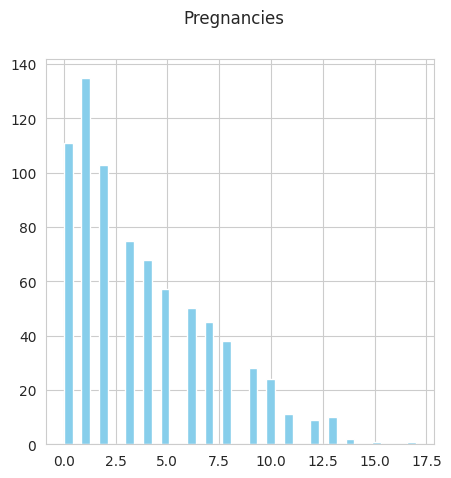

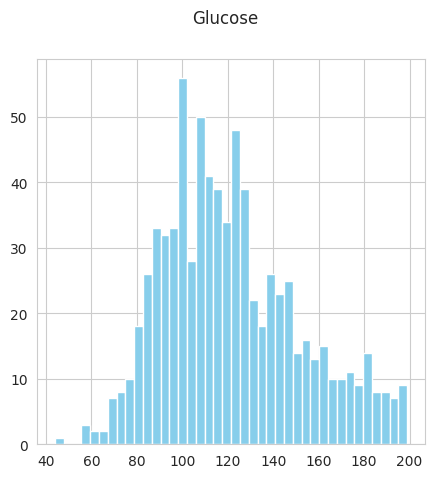

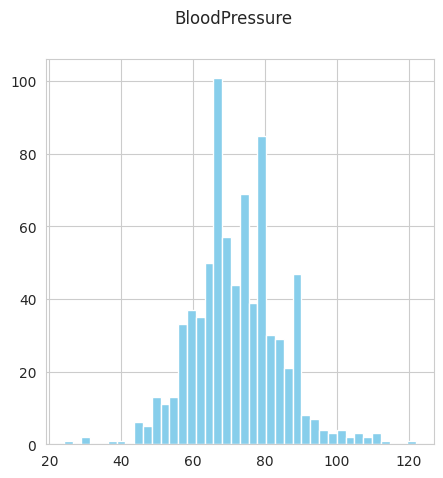

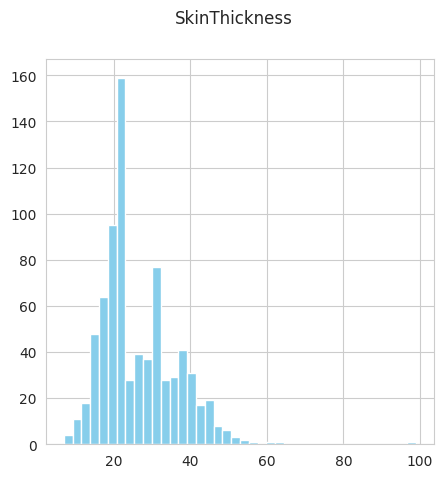

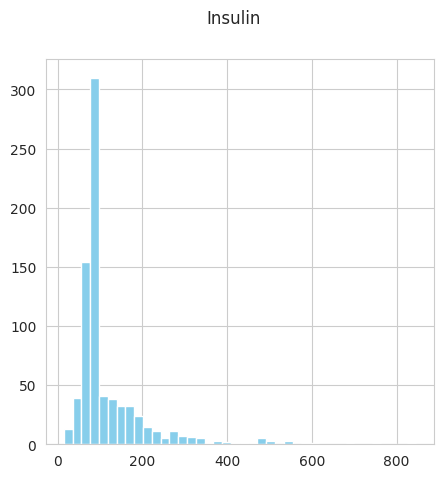

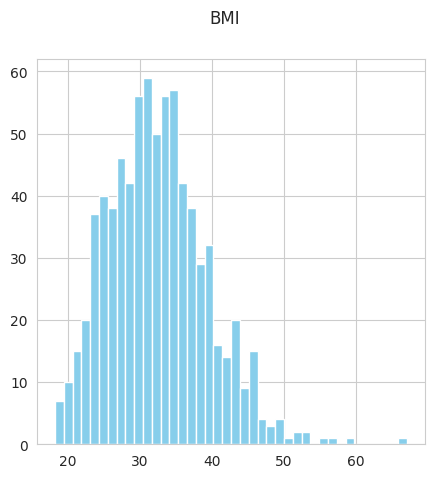

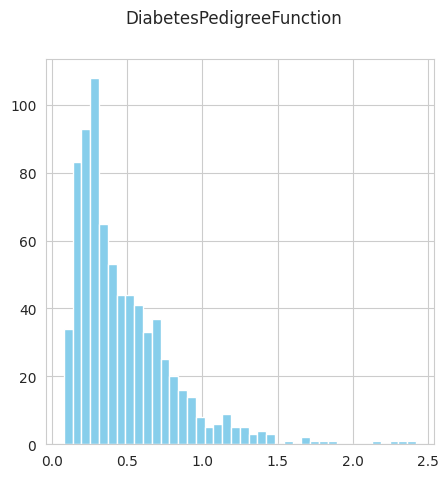

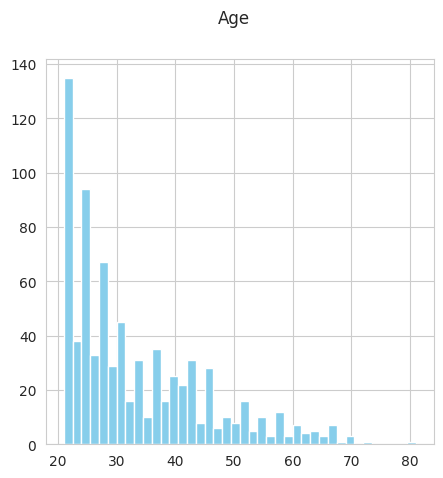

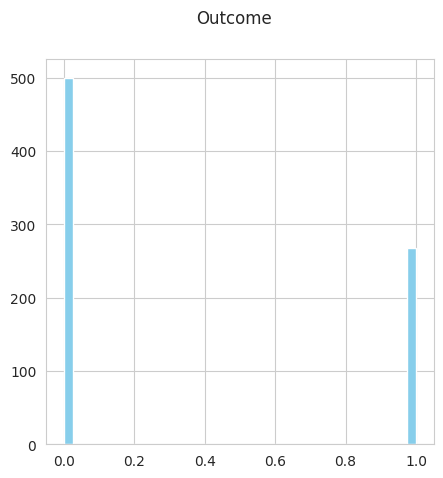

In [ ]:
# show new histogram after missing value cleaning
for i in df2.columns:
    df2[i].hist(bins=40, figsize=(5,5), color='skyblue')
    plt.suptitle(i)
    plt.show()

In [ ]:
# drop outliers of insulin

# Calculate the IQR for Insulin
Q1 = df2['Insulin'].quantile(0.25)
Q3 = df2['Insulin'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df2 = df2[(df2['Insulin'] >= lower_bound) & (df2['Insulin'] <= upper_bound)]


In [ ]:
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000
mean,3.836941,118.431457,72.050505,25.802255,93.246557,32.048147,0.460296,33.160173,0.327561
std,3.376340,29.026336,12.038908,9.505667,38.013627,6.746903,0.319977,11.744586,0.469663
min,0.000000,44.000000,24.000000,8.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,98.000000,64.000000,20.011364,66.227273,27.300000,0.238000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,21.580169,84.075949,31.600000,0.362000,29.000000,0.000000
75%,6.000000,136.000000,80.000000,32.000000,100.000000,35.900000,0.600000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,210.000000,67.100000,2.420000,81.000000,1.000000


## **4. HEATMAP**

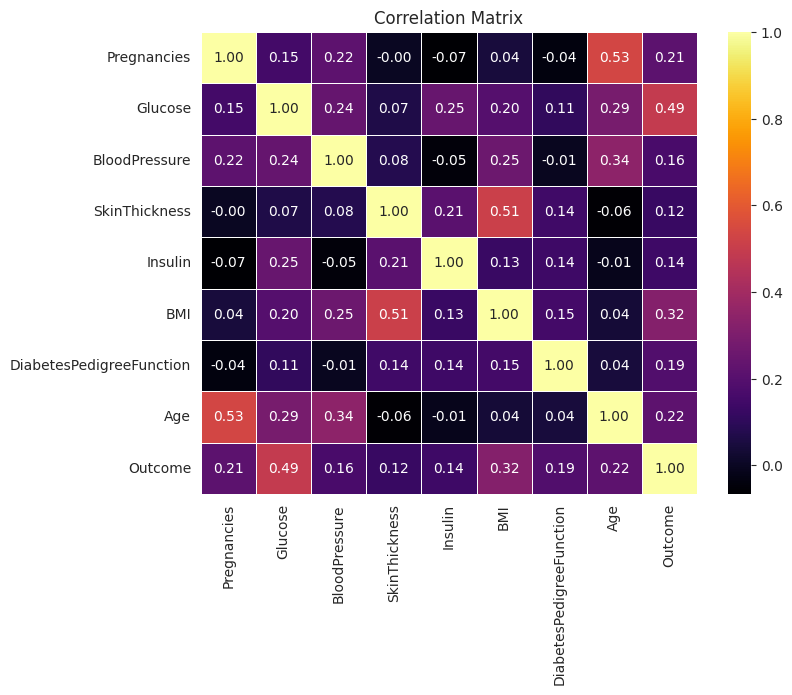

In [ ]:
# show correlation matrix for normalized dataframe

correlation_matrix = df2.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Coming from this correlation matrix, we can assume that



*   Correlation between (Outcome) and (Glucose) level is significant (0.49). We can conclude that glucose level in the blood might be the major indicator for being diagnosed with diabetes.


*   the second high correlation between (Outcome) and body mass (BMI) can be assumed as low possitive correlated (0.32). it shows that people with higher body mass index will likely to arise the risk of being diabetic.

*   Third closest correlation is the diabetes (Outcome) and (Age) shows valued of moderately low (0.22). this indicates that as the increases of age potentially affects getting risk of diabetes becomes greater.


*   Two lowest correlated features to diabetes (Outcome) are SkinThickness (0.12) and Insulin (0.14). this might need more investigation whether these features might not providing useful information into machine learning model.




## **5. MODEL TRAINING & CONFUSION MATRIX ANALYSIS**

## Logistic Regression Training

In [ ]:
# initial training with logistic regression

df_processed = df2.copy()

X = df_processed.drop('Outcome', axis=1)
y = df_processed['Outcome']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print('Model Score',  model.score(X_train,y_train))

print("Accuracy: {:.2f}%".format(accuracy * 100))

print("Precision:", precision)

print("recall:", recall)

print("F1-score:", f1)

Model Score 0.7689530685920578
Accuracy: 72.66%
Precision: 0.5853658536585366
recall: 0.5333333333333333
F1-score: 0.5581395348837209


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# save pickle model

import pickle

pickle.dump(model, open('lg_model.p', 'wb'))

In [ ]:
# show confusion matrix of current logistic regression
cm = confusion_matrix(y_test, y_pred)
cm

array([[77, 17],
       [21, 24]])

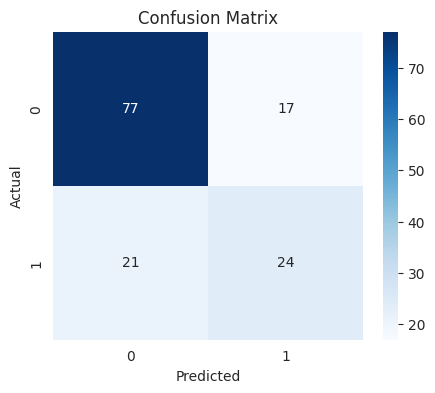

In [ ]:
# show confusion matrix visually
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.intercept_

array([-3.7175154])

In [ ]:
model.coef_

array([[ 0.16735874,  0.03407589, -0.04808293, -0.01520584, -0.00690423,
         0.06625892,  2.07007545, -0.01036234]])

In [ ]:
# Attempt to predict inputed value
prediction_data = [[7, 56, 55, 20, 50, 33.6, 0.7, 37]]
predictions = model.predict(prediction_data)

print(predictions)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



## FEATURE SELECTION

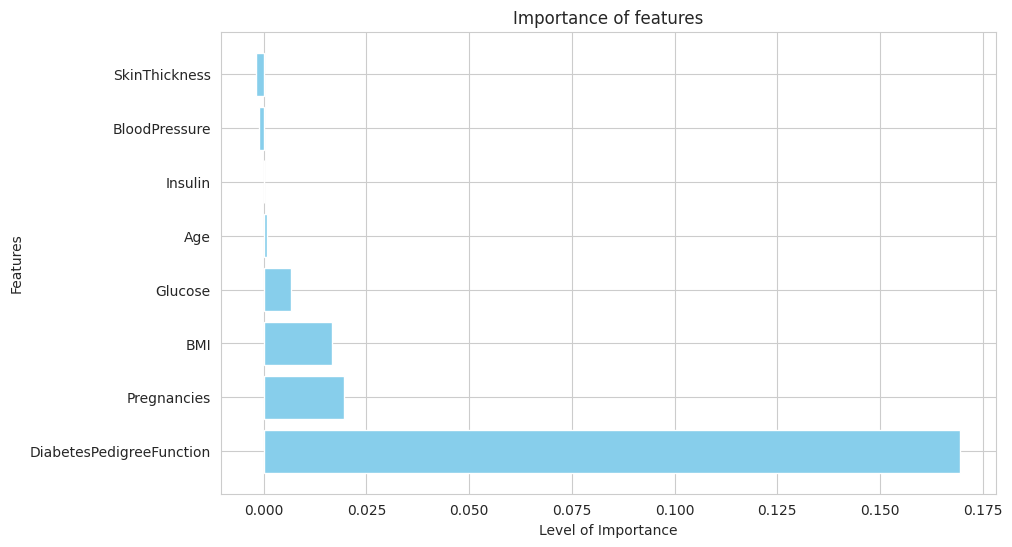

In [ ]:
# copy data frame for linear regression model
df3 = df2.copy()

# Split the data into features (X) and target variable (y)
X = df3.drop('Outcome', axis=1)
y = df3['Outcome']

# training linear regression model
model = LinearRegression()
model.fit(X, y)

# Getting coeficients of the features
lr_coef = model.coef_

# creating data frame from coeficient for visualiaztion
important_label = pd.DataFrame({'Features': X.columns, 'Importance': lr_coef})
important_label = important_label.sort_values(by='Importance', ascending=False)

# Plot the bar graph of the importance of the features
plt.figure(figsize=(10, 6))
plt.barh(important_label['Features'], important_label['Importance'], color='skyblue')
plt.xlabel('Level of Importance')
plt.ylabel('Features')
plt.title('Importance of features')
plt.show()

In [ ]:
# show coef value in table
important_label

,Features,Importance
6,DiabetesPedigreeFunction,0.169542
0,Pregnancies,0.019641
5,BMI,0.016554
1,Glucose,0.006646
7,Age,0.000838
4,Insulin,0.000126
2,BloodPressure,-0.001164
3,SkinThickness,-0.001906


3. Using selected features for more optimized results

In [ ]:
# selecting chosen features for new model
selected_features = ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Split the data into features (X) and target variable (y)
X = df2[selected_features]
y = df2['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# training linear regression model
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print('Model Score',  model.score(X_train,y_train))

print("Accuracy: {:.2f}%".format(accuracy * 100))

print("Precision:", precision)

print("recall:", recall)

print("F1-score:", f1)

print(classification_report(y_test,y_pred))


Model Score 0.7870036101083032
Accuracy: 79.86%
Precision: 0.7073170731707317
recall: 0.6444444444444445
F1-score: 0.6744186046511628
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        94
           1       0.71      0.64      0.67        45

    accuracy                           0.80       139
   macro avg       0.77      0.76      0.76       139
weighted avg       0.79      0.80      0.80       139



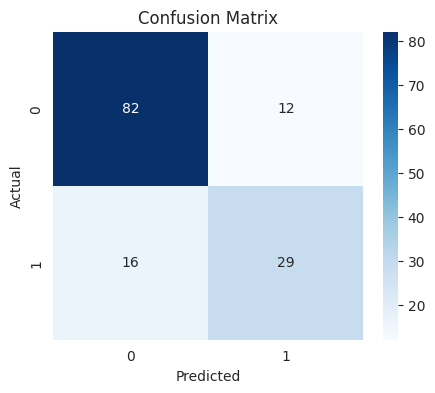

In [ ]:
# show visual representation of new confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Logistic regression produce accuracy of 79.86%, Precision: 0.71, recall: 0.64, and F1-score: 0.67

Logistic Regression model succeed predicted 82 samples of the negative class (0) and 29 samples of the positive class (1). However, this model having 12 false positives and 16 false negatives.

from the viualization above, based on the confusion matrix, we can see that the model has some difficulties in predicting class 1 (positive) more accurately. This suggests that there is room for improvement by adding more data to the 1 (positive) group in order to counter balance numbers of negative (0) data. then perhaps through adjustments to hyperparameters, or even the use of a more complex model.

## KNN Training

Model Score 0.8176895306859205
Accuracy: 73.38%
Precision: 0.5833333333333334
recall: 0.6222222222222222
F1-score: 0.6021505376344086
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        94
           1       0.58      0.62      0.60        45

    accuracy                           0.73       139
   macro avg       0.70      0.70      0.70       139
weighted avg       0.74      0.73      0.74       139



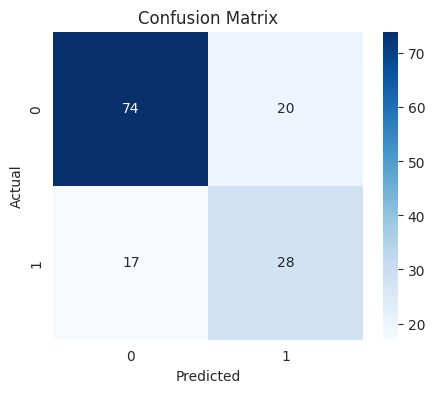

In [ ]:
df5 = df2.copy()

selected_features = ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']
X = df5[selected_features]
y = df5['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print('Model Score',  knn_model.score(X_train,y_train))

print("Accuracy: {:.2f}%".format(accuracy * 100))

print("Precision:", precision)

print("recall:", recall)

print("F1-score:", f1)


print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


##**6. Conclusion**

there is visible imbalance between outcome class ( 0 and 1). 0 class which indicates diabetic ( majority ) outnumbered of other instance which is 1 indicates as non-diabetic.

<br>

it is also shown in classification metrics, precision, recall and F1-score for class where quite significantly lower than the majority class. this specify that classifier have difficulties to predict the result of the minority class. also high accuracy can contribute to potentially misclassifying instance of minority instance, in this case is non-diabetic.

<br>

for medical diagnostics that identifies and predict diseases, it is crucial to prioritize higher recall value on majority class that indicates patient who suffers from diabetes. in this case, detecting diabetes as nearly as possible from several key hints is more important as to gain less false negative. thus choosing the classifier with higher recall value is priority as it is compensating of imbalanceness of target class.
